# **ML Assignment 01 – Sahil’s Wildlife Rescue Classification Challenge**

Sahil runs a small wildlife rescue centre. Whenever an injured bird is brought in, the staff record details about it like species, weight, habitat, injury type, etc. He now wants to build a simple Machine Learning model that predicts whether a rescued bird will recover or not within two weeks.

You have been hired as a Data Science Assistant at Sahil’s Wildlife Care to help automate this process using the techniques you learned in class.

**Dataset:** sahil_wildlife_recovery.csv

The dataset contains 1,000 records, each representing a rescued bird.
Each row includes various features related to the bird’s condition and background.

| Column Name          | Description                                                                             |
| -------------------- | --------------------------------------------------------------------------------------- |
| `bird_id`            | Unique ID for each bird                                                                 |
| `species`            | Type of bird (e.g., Sparrow, Parrot, Falcon, Crow, Pigeon)                              |
| `age_group`          | Age group (Chick, Juvenile, Adult)                                                      |
| `weight`             | Weight in grams                                                                         |
| `injury_type`        | Main injury (Wing Fracture, Leg Injury, Dehydration, Poisoning, Minor Cut, Head Trauma) |
| `habitat_region`     | Area bird was rescued from (Urban, Forest, Desert, Coastal)                             |
| `arrival_day`        | Day of the week it arrived                                                              |
| `received_treatment` | Whether treatment was administered on the first day (Yes/No)                            |
| `hours_in_care`      | Total hours spent under care so far                                                     |
| `recovered`          | **Target variable** — whether the bird recovered within 14 days (Yes/No)                |

You will use classification algorithms to predict `recovered`.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score, recall_score, f1_score
pd.set_option("display.max_columns", None)


## **Step 1 – Exploring the Dataset (10 marks)**

Load the dataset and display the first 10 rows to get an overview (2 marks)

In [2]:
df=pd.read_csv("/content/sahil_wildlife_recovery.csv")
df.head(10)

,bird_id,species,age_group,weight,injury_type,habitat_region,arrival_day,received_treatment,hours_in_care,recovered
0,B001,Sparrow,Adult,45,Minor Cut,Urban,Monday,Yes,72,Yes
1,B002,Parrot,Juvenile,95,Wing Fracture,Forest,Tuesday,Yes,168,Yes
2,B003,Crow,Adult,120,Dehydration,Urban,Wednesday,No,24,No
3,B004,Falcon,Adult,980,Leg Injury,Desert,Thursday,Yes,210,Yes
4,B005,Pigeon,Juvenile,320,Minor Cut,Urban,Friday,Yes,60,Yes
5,B006,Sparrow,Chick,30,Poisoning,Urban,Saturday,No,36,No
6,B007,Parrot,Adult,105,Head Trauma,Forest,Sunday,Yes,192,No
7,B008,Crow,Juvenile,150,Dehydration,Coastal,Monday,Yes,84,Yes
8,B009,Falcon,Adult,1100,Leg Injury,Desert,Tuesday,Yes,240,Yes
9,B010,Pigeon,Chick,280,Wing Fracture,Urban,Wednesday,No,48,No


Check basic information and shape of the dataset (2 marks)

In [3]:
print(df.info(),"\n")
print("Rows and  Columns in the dataset\n" , df.shape,"\n")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   bird_id             1000 non-null   object
 1   species             1000 non-null   object
 2   age_group           1000 non-null   object
 3   weight              1000 non-null   int64 
 4   injury_type         1000 non-null   object
 5   habitat_region      1000 non-null   object
 6   arrival_day         1000 non-null   object
 7   received_treatment  1000 non-null   object
 8   hours_in_care       1000 non-null   int64 
 9   recovered           1000 non-null   object
dtypes: int64(2), object(8)
memory usage: 78.3+ KB
None 

Rows and  Columns in the dataset
 (1000, 10) 

            weight  hours_in_care
count  1000.000000    1000.000000
mean    308.257000     131.470000
std     344.652344      53.795251
min      28.000000      18.000000
25%      74.000000      96.000000
50%     1

Check for missing values and duplicates in the dataset (3 marks)

In [4]:
missing_values=(df.isnull().sum())/len(df) * 100
print(missing_values)

bird_id               0.0
species               0.0
age_group             0.0
weight                0.0
injury_type           0.0
habitat_region        0.0
arrival_day           0.0
received_treatment    0.0
hours_in_care         0.0
recovered             0.0
dtype: float64


In [5]:
duplicate_values=df.duplicated().sum()
print(duplicate_values)

0


Show the unique values in the target column `recovered` and count how many birds recovered and how many did not (3 marks)

In [6]:
df['recovered'].unique()

array(['Yes', 'No'], dtype=object)

In [7]:
df['recovered'].value_counts()

,count
recovered,
Yes,868
No,132


## **Step 2 – Data Cleaning & Preprocessing (15 marks)**

Handle missing values if any, and remove duplicates if found (3 marks)

In [8]:
# no missing value and duplicate value in the dataset

In [9]:
X=df.drop(['recovered','bird_id'],axis=1)
y=df["recovered"]

In [10]:
X

,species,age_group,weight,injury_type,habitat_region,arrival_day,received_treatment,hours_in_care
0,Sparrow,Adult,45,Minor Cut,Urban,Monday,Yes,72
1,Parrot,Juvenile,95,Wing Fracture,Forest,Tuesday,Yes,168
2,Crow,Adult,120,Dehydration,Urban,Wednesday,No,24
3,Falcon,Adult,980,Leg Injury,Desert,Thursday,Yes,210
4,Pigeon,Juvenile,320,Minor Cut,Urban,Friday,Yes,60
...,...,...,...,...,...,...,...,...
995,Sparrow,Adult,47,Dehydration,Urban,Tuesday,Yes,96
996,Parrot,Juvenile,93,Minor Cut,Forest,Wednesday,Yes,132
997,Crow,Adult,125,Leg Injury,Urban,Thursday,Yes,144
998,Falcon,Adult,980,Poisoning,Desert,Friday,Yes,192


In [11]:
y

,recovered
0,Yes
1,Yes
2,No
3,Yes
4,Yes
...,...
995,Yes
996,Yes
997,Yes
998,Yes


In [12]:
print("X Shape",X.shape)
print("y Shape",y.shape)

X Shape (1000, 8)
y Shape (1000,)


Encode the categorical columns using One-Hot Encoding (4 marks)

In [13]:
categorical_column= X.select_dtypes(include=['object']).columns
categorical_column.to_list()

['species',
 'age_group',
 'injury_type',
 'habitat_region',
 'arrival_day',
 'received_treatment']

Scale numeric columns using StandardScaler (4 marks)

In [14]:
numerical_column=X.select_dtypes(include=['int64','float64']).columns
numerical_column.to_list()

['weight', 'hours_in_care']

In [15]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_column),
        ('num', StandardScaler(), numerical_column)
    ]
)

In [16]:
preprocessor

ColumnTransformer(transformers=[('cat',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 Index(['species', 'age_group', 'injury_type', 'habitat_region', 'arrival_day',
       'received_treatment'],
      dtype='object')),
                                ('num', StandardScaler(),
                                 Index(['weight', 'hours_in_care'], dtype='object'))])

Split the dataset into 80% train and 20% test sets (4 marks)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
print("X-Train Shape",X_train.shape)
print("X-Test Shape",X_test.shape)
print("y-Train Shape",y_train.shape)
print("y-Test Shape",y_test.shape)

X-Train Shape (800, 8)
X-Test Shape (200, 8)
y-Train Shape (800,)
y-Test Shape (200,)


## **Step 3 – Model Training & Evaluation (20 marks)**

Train a Logistic Regression model and print accuracy, precision, recall, and F1 scores (5 marks)

In [19]:
log_reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression())
])

In [20]:
log_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['species', 'age_group', 'injury_type', 'habitat_region', 'arrival_day',
       'received_treatment'],
      dtype='object')),
                                                 ('num', StandardScaler(),
                                                  Index(['weight', 'hours_in_care'], dtype='object'))])),
                ('classifier', LogisticRegression())])

In [21]:
y_pred=log_reg.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred, pos_label='Yes')
recall=recall_score(y_test,y_pred, pos_label='Yes')
f1=f1_score(y_test,y_pred, pos_label='Yes')

print("Accuracy Score",accuracy)
print("Precision Score",precision)
print("Recall Score",recall)
print("F1 Score",f1)

Accuracy Score 1.0
Precision Score 1.0
Recall Score 1.0
F1 Score 1.0


In [22]:
train_accuracy = log_reg.score(X_train, y_train)
test_accuracy = log_reg.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9975
Testing Accuracy: 1.0000


Train a Decision Tree Classifier and print the same metrics (5 marks)

In [23]:
dt_pipeline=Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("classifier",DecisionTreeClassifier())
])

dt_pipeline.fit(X_train,y_train)

dt_y_pred=dt_pipeline.predict(X_test)

dt_accuracy=accuracy_score(y_test,dt_y_pred)
dt_precision=precision_score(y_test,dt_y_pred, pos_label='Yes')
dt_recall=recall_score(y_test,dt_y_pred, pos_label='Yes')
dt_f1=f1_score(y_test,dt_y_pred, pos_label='Yes')

print("Accuracy Score",dt_accuracy)
print("Precision Score",dt_precision)
print("Recall Score",dt_recall)
print("F1 Score",dt_f1)

train_accuracy = dt_pipeline.score(X_train, y_train)
test_accuracy = dt_pipeline.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Accuracy Score 1.0
Precision Score 1.0
Recall Score 1.0
F1 Score 1.0
Training Accuracy: 1.0000
Testing Accuracy: 1.0000


Train a Random Forest Classifier and print the same metrics (5 marks)

In [24]:
rf_pipeline=Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("classifier",RandomForestClassifier())
])

rf_pipeline.fit(X_train,y_train)

rf_y_pred=rf_pipeline.predict(X_test)

rf_accuracy=accuracy_score(y_test,rf_y_pred)
rf_precision=precision_score(y_test,rf_y_pred, pos_label='Yes')
rf_recall=recall_score(y_test,rf_y_pred, pos_label='Yes')
rf_f1=f1_score(y_test,rf_y_pred, pos_label='Yes')

print("Accuracy Score",rf_accuracy)
print("Precision Score",rf_precision)
print("Recall Score",rf_recall)
print("F1 Score",rf_f1)

train_accuracy = rf_pipeline.score(X_train, y_train)
test_accuracy = rf_pipeline.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Accuracy Score 1.0
Precision Score 1.0
Recall Score 1.0
F1 Score 1.0
Training Accuracy: 1.0000
Testing Accuracy: 1.0000


Create a table showing accuracy, precision, recall, and F1 for all three models (5 marks)

In [25]:
data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy, dt_accuracy, rf_accuracy],
    'Precision': [precision, dt_precision, rf_precision],
    'Recall': [recall, dt_recall, rf_recall],
    'F1 Score': [f1, dt_f1, rf_f1]
}

table = pd.DataFrame(data)
print(table)

                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression       1.0        1.0     1.0       1.0
1        Decision Tree       1.0        1.0     1.0       1.0
2        Random Forest       1.0        1.0     1.0       1.0


## **Step 4 – Model Comparison & Insights (10 marks)**

Plot a bar chart comparing the accuracy scores of the three models (5 marks)

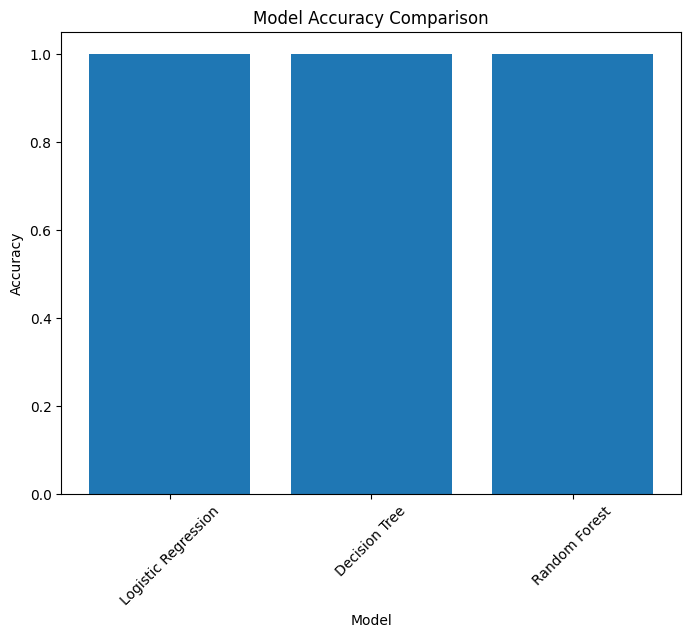

In [26]:
plt.figure(figsize=(8, 6))
plt.bar(table['Model'], table['Accuracy'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.show()

Which model performed best and why? Explain briefly in 2–3 sentences (5 marks)

Based on the evaluation metrics (Accuracy, Precision, Recall, and F1 Score) calculated, all three models (Logistic Regression, Decision Tree, and Random Forest) achieved perfect scores of 1.0 on the test set. This suggests that all models performed equally well in predicting whether a bird would recover or not in this dataset. With perfect scores, it's not possible to distinguish which model is "best" based on these metrics alone.

## **Step 5 – Interpretation & Conclusion (5 marks)**

Do you notice any class imbalance in the target variable? If yes, how might it affect the results? (2 marks)

Yes, there is a noticeable class imbalance in the target variable `recovered`. As shown by the value counts, there are significantly more instances of birds that recovered ('Yes' - 868) compared to those that did not recover ('No' - 132).

Class imbalance can sometimes lead to models that are biased towards the majority class, potentially performing poorly on the minority class. While the models here achieved perfect scores, in datasets with less distinct patterns, this imbalance could inflate accuracy (as the model can simply predict the majority class often) and require using evaluation metrics more suitable for imbalanced data, such as precision, recall, and F1-score, or techniques like resampling or using different algorithms.

Write 2–3 lines summarizing what you learned from this assignment and how you would improve the model next time (3 marks)

This assignment demonstrated the process of building, training, and evaluating classification models. While the models achieved perfect scores on this dataset, in a real-world scenario, I would investigate potential data leakage and consider techniques for handling class imbalance if the data were less separable.